In [1]:
%pylab inline
import convis

Populating the interactive namespace from numpy and matplotlib


Using gpu device 0: Quadro K620 (CNMeM is disabled, cuDNN not available)


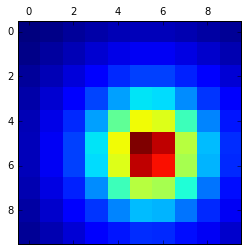

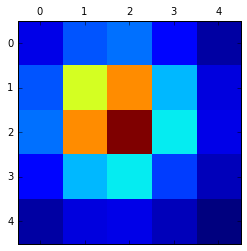

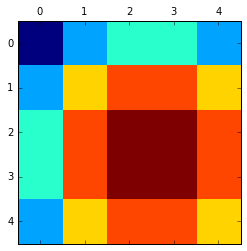

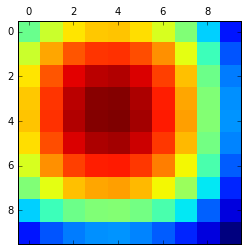

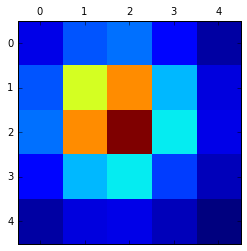

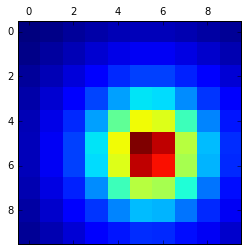

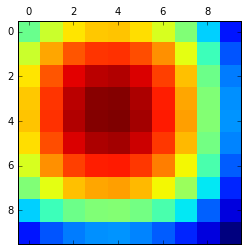

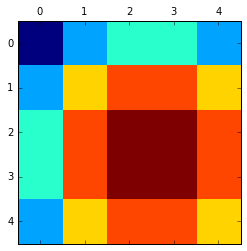

In [123]:
def downscale_filter(x_from,y_from,x_to,y_to,d=lambda x: 1.0/(x**2+1.0)):
    assert(x_from >= x_to)
    assert(y_from >= y_to)
    w = np.zeros((x_from,y_from,x_to,y_to))
    for x in xrange(x_to):
        for y in xrange(y_to):
            X,Y = np.meshgrid(np.linspace(0,x_to,x_from)-x,np.linspace(0,y_to,y_from)-y)
            if d is None:
                min_dist = np.argmin(np.sqrt(X**2+Y**2).flatten())
                x_min,ymin = min_dist%x_from, min_dist/x_from
                w[x_min,ymin,x,y] = 1.0
            else:
                dist = np.sqrt(X**2+Y**2)
                w_ = d(dist)
                w[:,:,x,y] = w_
    return w

def upscale_filter(x_from,y_from,x_to,y_to,d=lambda x: 1.0/(x**2+1.0)):
    assert(x_from <= x_to)
    assert(y_from <= y_to)
    w = np.zeros((x_from,y_from,x_to,y_to))
    for x in xrange(x_from):
        for y in xrange(y_from):
            X,Y = np.meshgrid(np.linspace(0,x_from,x_to)-x,np.linspace(0,y_from,y_to)-y)
            if d is None:
                min_dist = np.argmin(np.sqrt(X**2+Y**2).flatten())
                x_min,ymin = min_dist%x_to, min_dist/x_to
                w[x,y,x_min,ymin] = 1.0
            else:
                dist = np.sqrt(X**2+Y**2)
                w_ = d(dist)
                #print np.mean(w_)
                w[x,y,:,:] = w_
    return w
w = downscale_filter(10,10,5,5)
matshow(w[:,:,3,3])
matshow(w[3,3,:,:])
matshow(w.mean((0,1)))
matshow(w.mean((2,3)))

w = upscale_filter(5,5,10,10)
matshow(w[:,:,3,3])
matshow(w[3,3,:,:])
matshow(w.mean((0,1)))
matshow(w.mean((2,3)))


In [104]:
scale_up = convis.filters.simple.FullConnection(config={'w':upscale_filter(10,10,50,50,d=None)})
scale_down = convis.filters.simple.FullConnection(config={'w':downscale_filter(50,50,10,10,d=None)})
scale_down += scale_up
m = convis.M()
m.add_output(scale_down)
m.add_output(scale_up)

In [105]:
the_input = np.zeros((100,10,10))
for i in range(len(the_input)):
    the_input[i,i/10,i%10] = rand()
    
o = m.run(the_input)

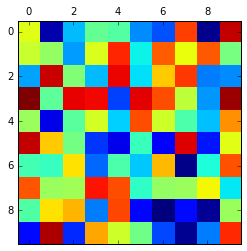

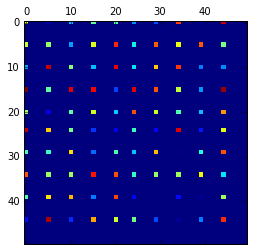

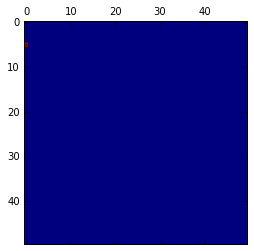

In [106]:
matshow(np.mean(o[0],0))
matshow(np.mean(o[1],0))
matshow(o[1][10])

In [107]:
convis.describe([o[0],the_input])

{}

# Todo: find a good interpolation function

{}

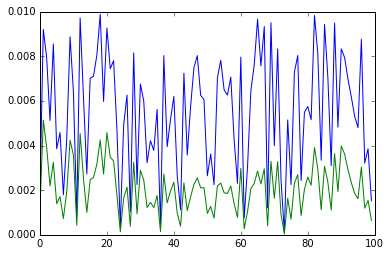

In [141]:
from scipy.ndimage import gaussian_filter
the_input = np.zeros((100,10,10))
for i in range(len(the_input)):
    the_input[i,i/10,i%10] = rand()
    the_input[i,:,:] = gaussian_filter(the_input[i,:,:],2.0)
    
scale_up = convis.filters.simple.FullConnection(config={'w':upscale_filter(10,10,50,50,d=lambda x: exp(-x/0.1))})
scale_down = convis.filters.simple.FullConnection(config={'w':downscale_filter(50,50,10,10,d=lambda x: exp(-x/0.1))})
scale_down += scale_up
m = convis.M()
m.add_output(scale_down)
m.add_output(scale_up)
o = m.run(the_input)

plot(the_input.mean((1,2)))
plot(o[0].mean((1,2)))


convis.describe([the_input,o[0],o[1],o[0]-the_input])

In [137]:
import litus
litus.animate(o[0])

100%|██████████| 100/100 [00:06<00:00, 16.95it/s]


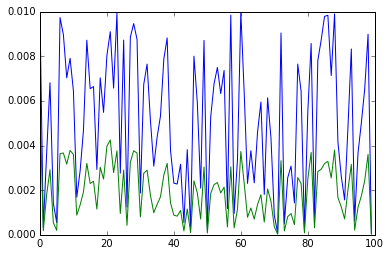